Implementing different sorting algorithms and BST for EDA 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "Life-Expectancy-Data-Updated.xlsx"  
life_expectancy_df = pd.read_excel(file_path)

print(life_expectancy_df.head())

print(life_expectancy_df.isnull().sum())


   Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.

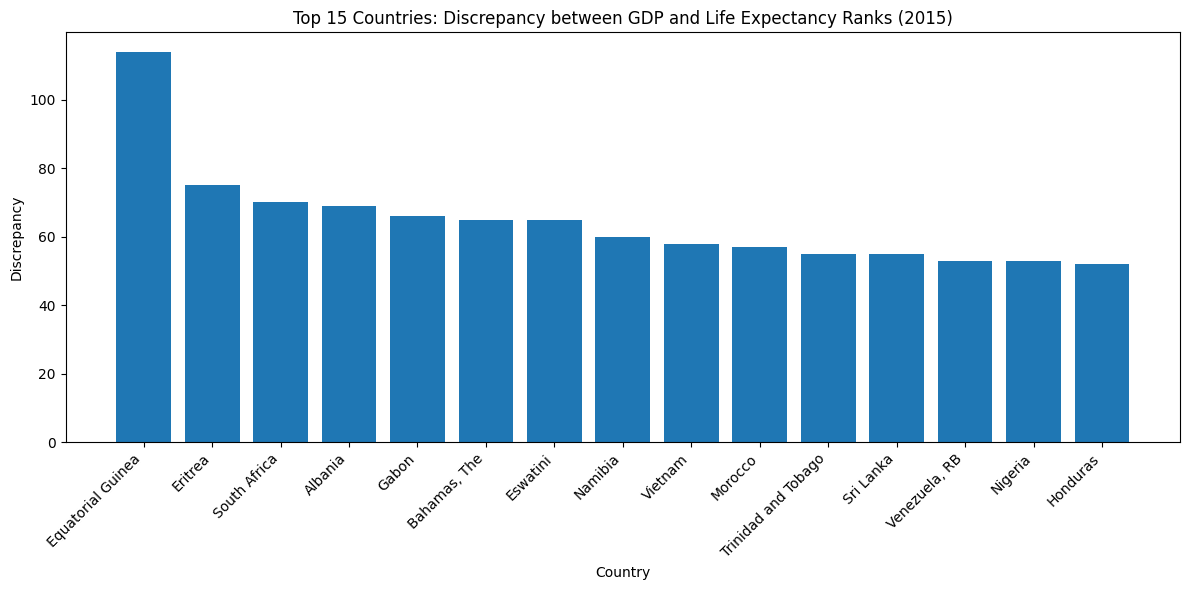

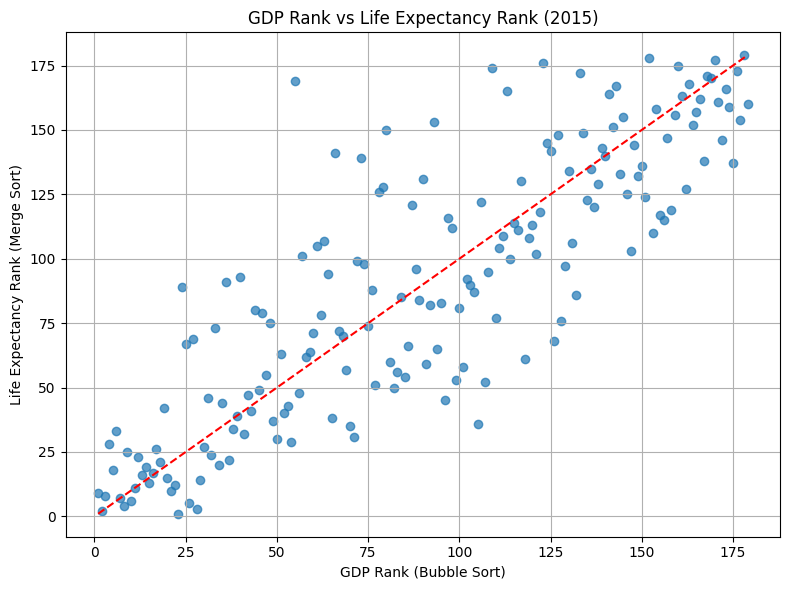

In [ ]:

life_data_2015 = life_expectancy_df[life_expectancy_df['Year'] == 2015][['Country', 'GDP_per_capita', 'Life_expectancy']].dropna()

# Convert DataFrame to list of dictionaries
data = life_data_2015.to_dict(orient='records')

# Bubble Sort (descending order) for GDP per capita
def bubble_sort_rank(arr, key):
    arr = arr.copy()
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j][key] < arr[j + 1][key]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

# Merge Sort (descending order) for Life Expectancy
def merge_sort_rank(arr, key):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    L = merge_sort_rank(arr[:mid], key)
    R = merge_sort_rank(arr[mid:], key)
    merged = []
    while L and R:
        if L[0][key] >= R[0][key]:
            merged.append(L.pop(0))
        else:
            merged.append(R.pop(0))
    merged.extend(L or R)
    return merged

# Apply Bubble Sort to GDP
gdp_sorted = bubble_sort_rank(data, 'GDP_per_capita')
for i, entry in enumerate(gdp_sorted):
    entry['GDP_Rank'] = i + 1

# Apply Merge Sort to Life Expectancy
life_sorted = merge_sort_rank(data, 'Life_expectancy')
for i, entry in enumerate(life_sorted):
    entry['Life_Rank'] = i + 1


sorted_df = pd.DataFrame(data)
sorted_df['Discrepancy'] = (sorted_df['GDP_Rank'] - sorted_df['Life_Rank']).abs()


top_discrepancies = sorted_df.sort_values(by='Discrepancy', ascending=False).head(15)

# Bar Chart of Top 15 Discrepancies 
plt.figure(figsize=(12, 6))
plt.bar(top_discrepancies['Country'], top_discrepancies['Discrepancy'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Countries: Discrepancy between GDP and Life Expectancy Ranks (2015)')
plt.xlabel('Country')
plt.ylabel('Discrepancy')
plt.tight_layout()
plt.show()

#Scatter Plot: GDP Rank vs Life Expectancy Rank 
plt.figure(figsize=(8, 6))
plt.scatter(sorted_df['GDP_Rank'], sorted_df['Life_Rank'], alpha=0.7)
plt.plot([1, sorted_df['GDP_Rank'].max()], [1, sorted_df['Life_Rank'].max()], color='red', linestyle='--')
plt.title('GDP Rank vs Life Expectancy Rank (2015)')
plt.xlabel('GDP Rank (Bubble Sort)')
plt.ylabel('Life Expectancy Rank (Merge Sort)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from graphviz import Digraph

file_path = "Life-Expectancy-Data-Updated.xlsx"
life_expectancy_df = pd.read_excel(file_path)

# Filter data for 2015
life_data_2015 = life_expectancy_df[life_expectancy_df['Year'] == 2015][['Country', 'Life_expectancy']].dropna()

# --- BST Implementation ---

class BSTNode:
    def __init__(self, key, country):
        self.key = key
        self.countries = [country]
        self.left = None
        self.right = None

    def insert(self, key, country):
        if key == self.key:
            self.countries.append(country)
        elif key < self.key:
            if self.left is None:
                self.left = BSTNode(key, country)
            else:
                self.left.insert(key, country)
        else:
            if self.right is None:
                self.right = BSTNode(key, country)
            else:
                self.right.insert(key, country)

    def inorder(self):
        result = []
        if self.left:
            result += self.left.inorder()
        result.append((self.key, self.countries))
        if self.right:
            result += self.right.inorder()
        return result

    def range_search(self, low, high):
        result = []
        if self.left and self.key > low:
            result += self.left.range_search(low, high)
        if low <= self.key <= high:
            result.append((self.key, self.countries))
        if self.right and self.key < high:
            result += self.right.range_search(low, high)
        return result

    def find_closest(self, target, closest=None):
        if closest is None or abs(self.key - target) < abs(closest.key - target):
            closest = self
        if target < self.key and self.left:
            return self.left.find_closest(target, closest)
        elif target > self.key and self.right:
            return self.right.find_closest(target, closest)
        return closest

    def visualize(self, dot=None, parent=None, label=""):
        if dot is None:
            dot = Digraph()
        node_label = f"{self.key}\n{', '.join(self.countries)}"
        dot.node(str(id(self)), node_label)
        if parent:
            dot.edge(str(id(parent)), str(id(self)), label=label)
        if self.left:
            self.left.visualize(dot, self, "L")
        if self.right:
            self.right.visualize(dot, self, "R")
        return dot

# Build BST from data
data_list = life_data_2015.to_dict(orient='records')
root = None
for entry in data_list:
    if root is None:
        root = BSTNode(entry['Life_expectancy'], entry['Country'])
    else:
        root.insert(entry['Life_expectancy'], entry['Country'])


# In-order traversal (sorted countries)
inorder_result = root.inorder()

# Countries with life expectancy in range 65–70
range_result = root.range_search(65, 70)

# Closest country to 75
closest_node = root.find_closest(75)
closest_result = (closest_node.key, closest_node.countries)

# --- Convert results to DataFrames ---
inorder_df = pd.DataFrame([(key, country) for key, countries in inorder_result for country in countries],
                          columns=['Life_expectancy', 'Country'])
range_df = pd.DataFrame([(key, country) for key, countries in range_result for country in countries],
                        columns=['Life_expectancy', 'Country'])
closest_df = pd.DataFrame([(closest_result[0], country) for country in closest_result[1]],
                          columns=['Closest_to_75', 'Country'])

# --- Visualize BST ---
tree_graph = root.visualize()
tree_graph.render("bst_life_expectancy", format="png", cleanup=True)  # Saves as bst_life_expectancy.png

print("In-order Traversal:")
print(inorder_df.head())

print("\nCountries with Life Expectancy 65–70:")
print(range_df)

print("\nCountry Closest to Life Expectancy 75:")
print(closest_df)


In-order Traversal:
   Life_expectancy                   Country
0             50.9  Central African Republic
1             51.0                   Lesotho
2             52.9              Sierra Leone
3             53.1                      Chad
4             53.1                   Nigeria

Countries with Life Expectancy 65–70:
    Life_expectancy                Country
0              65.0               Ethiopia
1              65.5             Madagascar
2              65.8                Myanmar
3              66.1            Yemen, Rep.
4              66.5                Lao PDR
5              66.6               Pakistan
6              66.7                Senegal
7              67.1                   Fiji
8              67.3               Botswana
9              67.3               Kiribati
10             67.3  Micronesia, Fed. Sts.
11             67.5                 Rwanda
12             67.7           Turkmenistan
13             68.5            Timor-Leste
14             68.6       

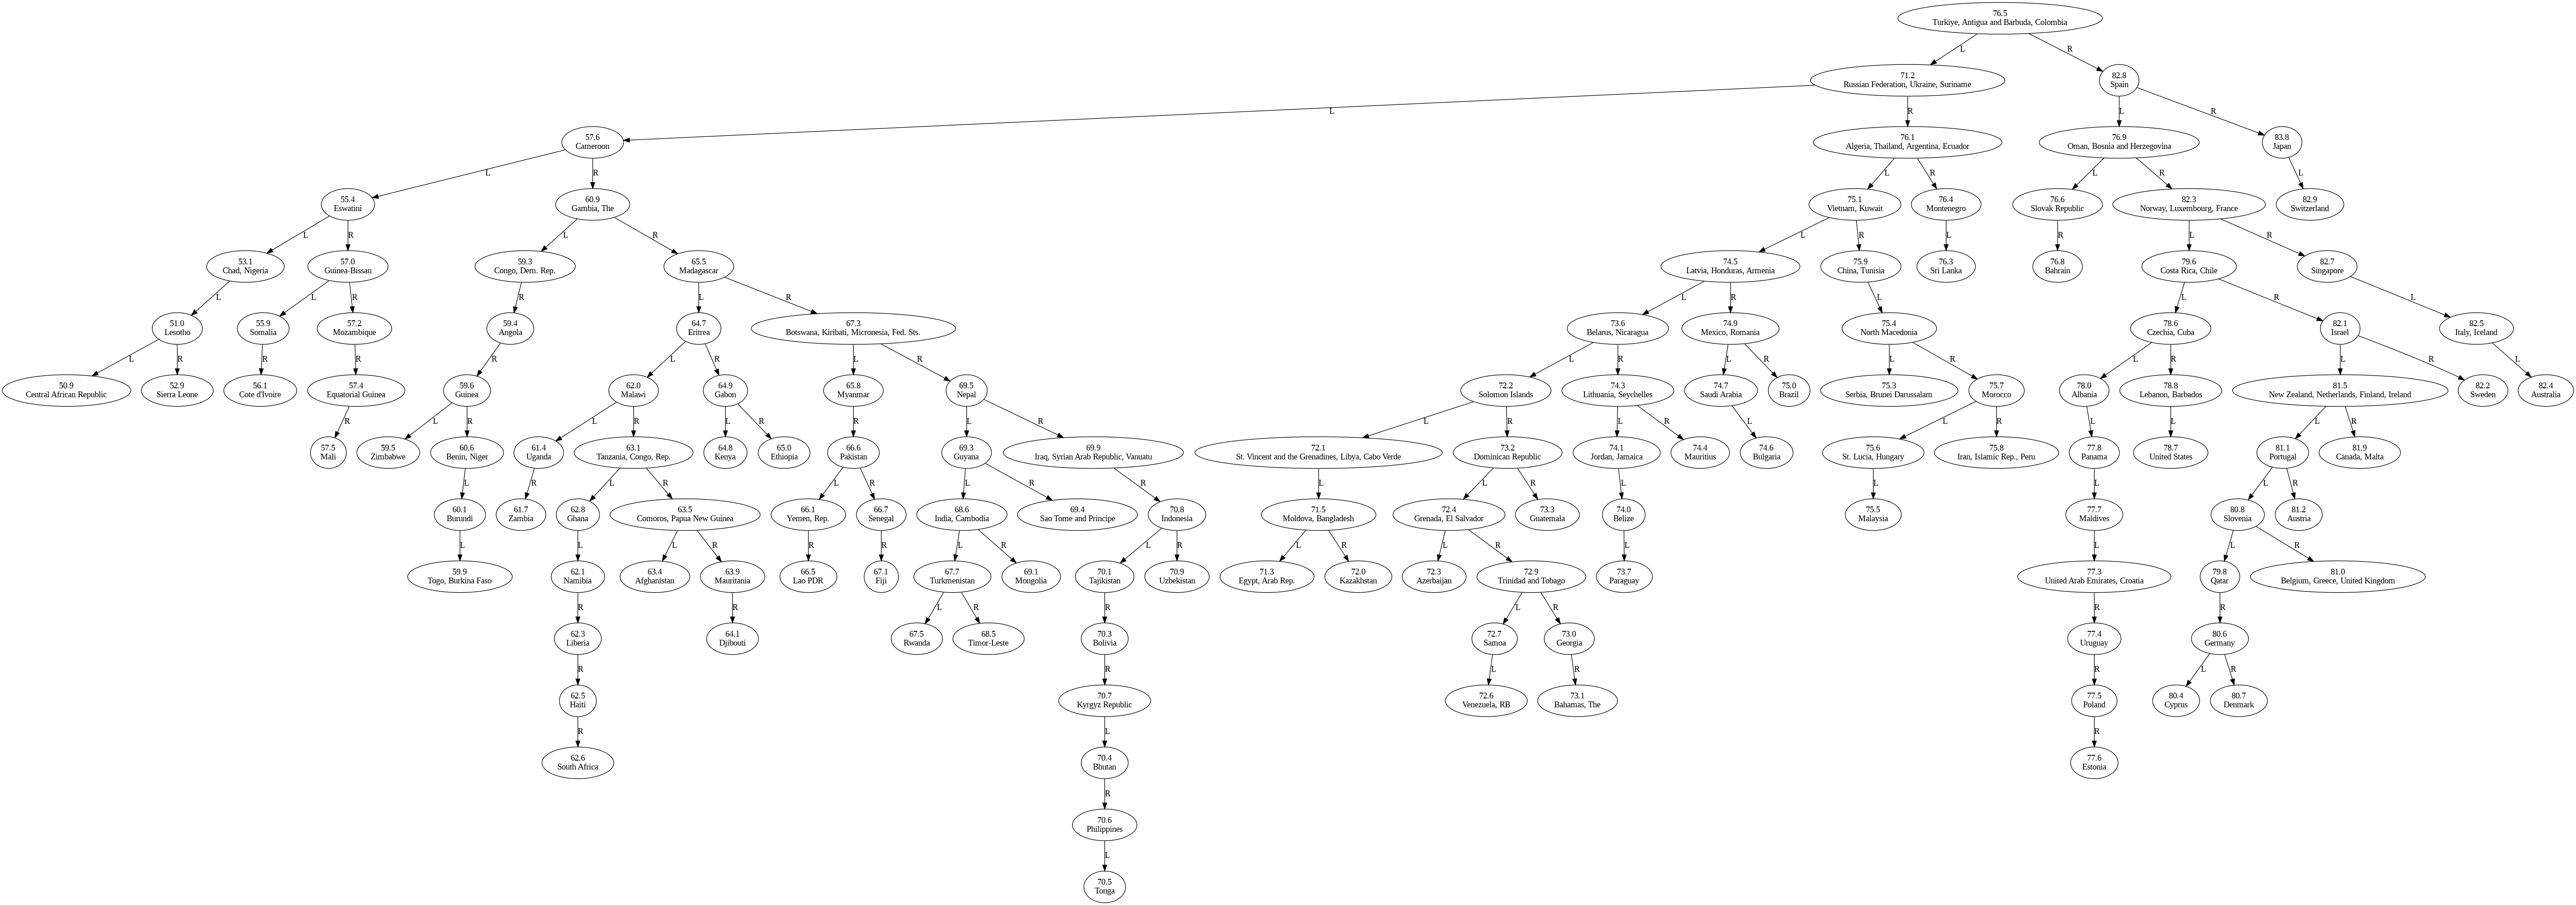

In [6]:
from IPython.display import Image
from graphviz import Digraph

# Generate and render the tree
tree_graph = root.visualize()
tree_graph.render("bst_life_expectancy", format="png", cleanup=True)

# Display in notebook
Image(filename="bst_life_expectancy.png")

Insight 1:

From Our discrepancy chart (ranking GDP vs. Life Expectancy), it is clear that:

Some countries with very high GDP per capita still have relatively low life expectancy.

Conversely, some countries with modest GDP achieve excellent health outcomes.

# Economic wealth doesn’t always translate to better public health

Insight 2:

Using Binary Search Tree we can find natural grouping of countries within a range. We discover that

# Mid-range countries like Ethiopia, Myanmar, and Lao PDR often have improving healthcare systems, growing investments in education, and lower urbanization

# for countries grouped below 60, we can see a pattern where even if GDP increases, the gains rarely trickle down to healthcare systems or social services.